In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import re
import matplotlib.pyplot as plt
from prettytable import PrettyTable

from utils import draw_trajectories, get_metric

In [4]:
def plot_nb_steps_per_seconds(names):
    fig, ax = plt.subplots(figsize=(4, 4), dpi=150)
    for name in names:
        seconds, mean_n_steps, std_n_steps = get_metric(
            name, metric='nb_step_by_sec')

        if isinstance(name, tuple):
            name, label = name
        else:
            label = name
        ax.plot(seconds, mean_n_steps, label=label, linewidth=1)
        ax.fill_between(seconds,
                        mean_n_steps - std_n_steps,
                        mean_n_steps + std_n_steps, alpha=.3)
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Number of steps per second')
    fig.legend(loc='upper center', bbox_to_anchor=(0.5, -.05))

In [5]:
def print_duration(names):
    table = PrettyTable()
    table.field_names = ['', 'Episode Duration (s)', 'Duration per step (s)']
    for name in names:
        if name == '':
            table.add_row(['', '', ''])
            continue
        print(f'Getting duration of {name}')
        n_envs = re.search(r'n-envs-(\d+)', name).group(1)
        _, mean_duration, std_duration = get_metric(name, metric='duration')
        duration_per_step = mean_duration / (int(n_envs) * 1000)
        table.add_row([name, f'{mean_duration.item():.2f} ± {std_duration.item():.2f}', f'{duration_per_step.item():.4f}'])
    print(table)

In [6]:
def print_derivatives(names):
    fig, axs = plt.subplots(1, 3, figsize=(3*4, 4), dpi=150)
    for name in names:
        if isinstance(name, tuple):
            name, label = name
        else:
            label = name
        print(f'Drawing derivatives of {name}')
        for i, metric in enumerate(['obs/dt_theta_boat/2', 'obs/dt_theta_rudder/0', 'obs/dt_theta_sail/0']):
            keys, mean_n_steps, std_n_steps = get_metric(name, metric=metric)
            axs[i].plot(keys, mean_n_steps, linewidth=1, label=label if i == 0 else None, alpha=.5)
            axs[i].fill_between(keys,
                            mean_n_steps - std_n_steps,
                            mean_n_steps + std_n_steps, alpha=.3)
            axs[i].set_xlabel('#steps')
            axs[i].set_ylabel(metric)

    fig.legend(loc='upper center', bbox_to_anchor=(0.5, -.05))

# Run 25/08 (ø)

pid-coeffs-tuning-upnquick-500trials-*/eval-*: 100%|██████████| 614/614 [00:31<00:00, 19.71it/s]


Failed to load 0 files for pid-coeffs-tuning-upnquick-500trials-*/eval-*


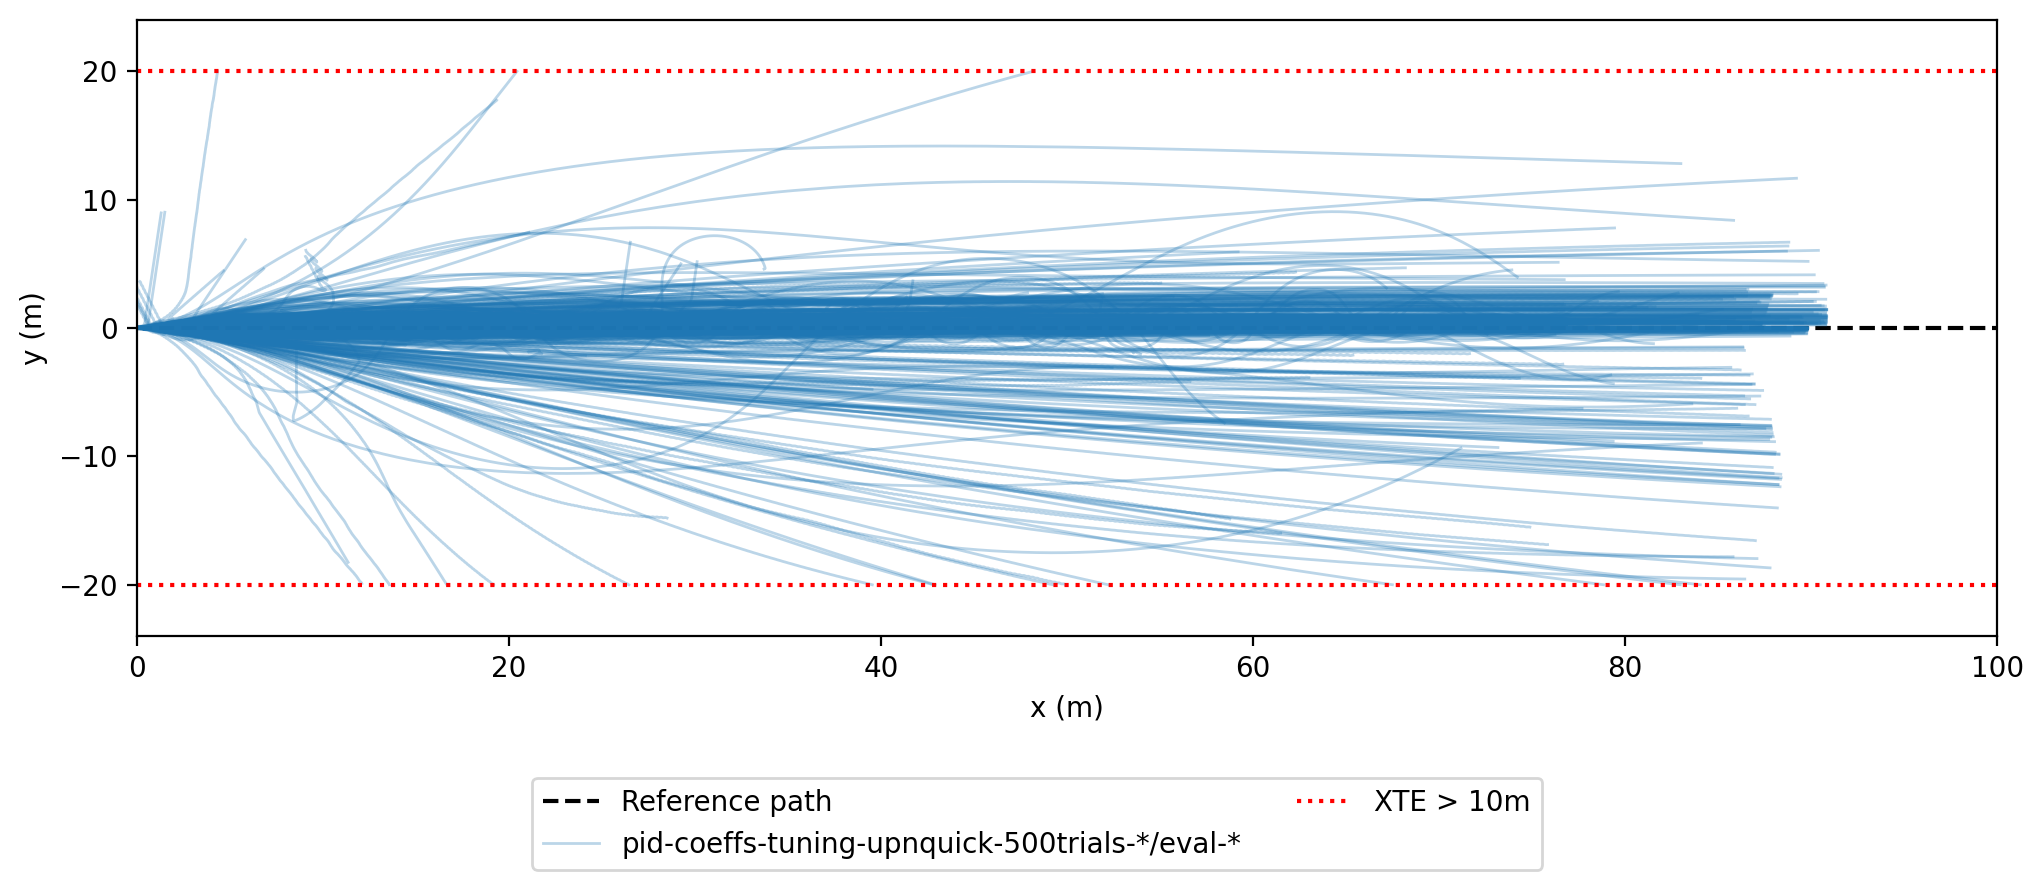

In [68]:
draw_trajectories([
    'pid-coeffs-tuning-upnquick-500trials-*/eval-*',
], xte_delta=20)

# Run 26/08 (1)

**Corrections:**
- Fix path length (was $200$ but it seems that the maximum path distance is $100$)

pid-coeffs-tuning-upnquick-1-trials-*/eval-*: 100%|██████████| 183/183 [00:10<00:00, 17.00it/s]


Failed to load 0 files for pid-coeffs-tuning-upnquick-1-trials-*/eval-*


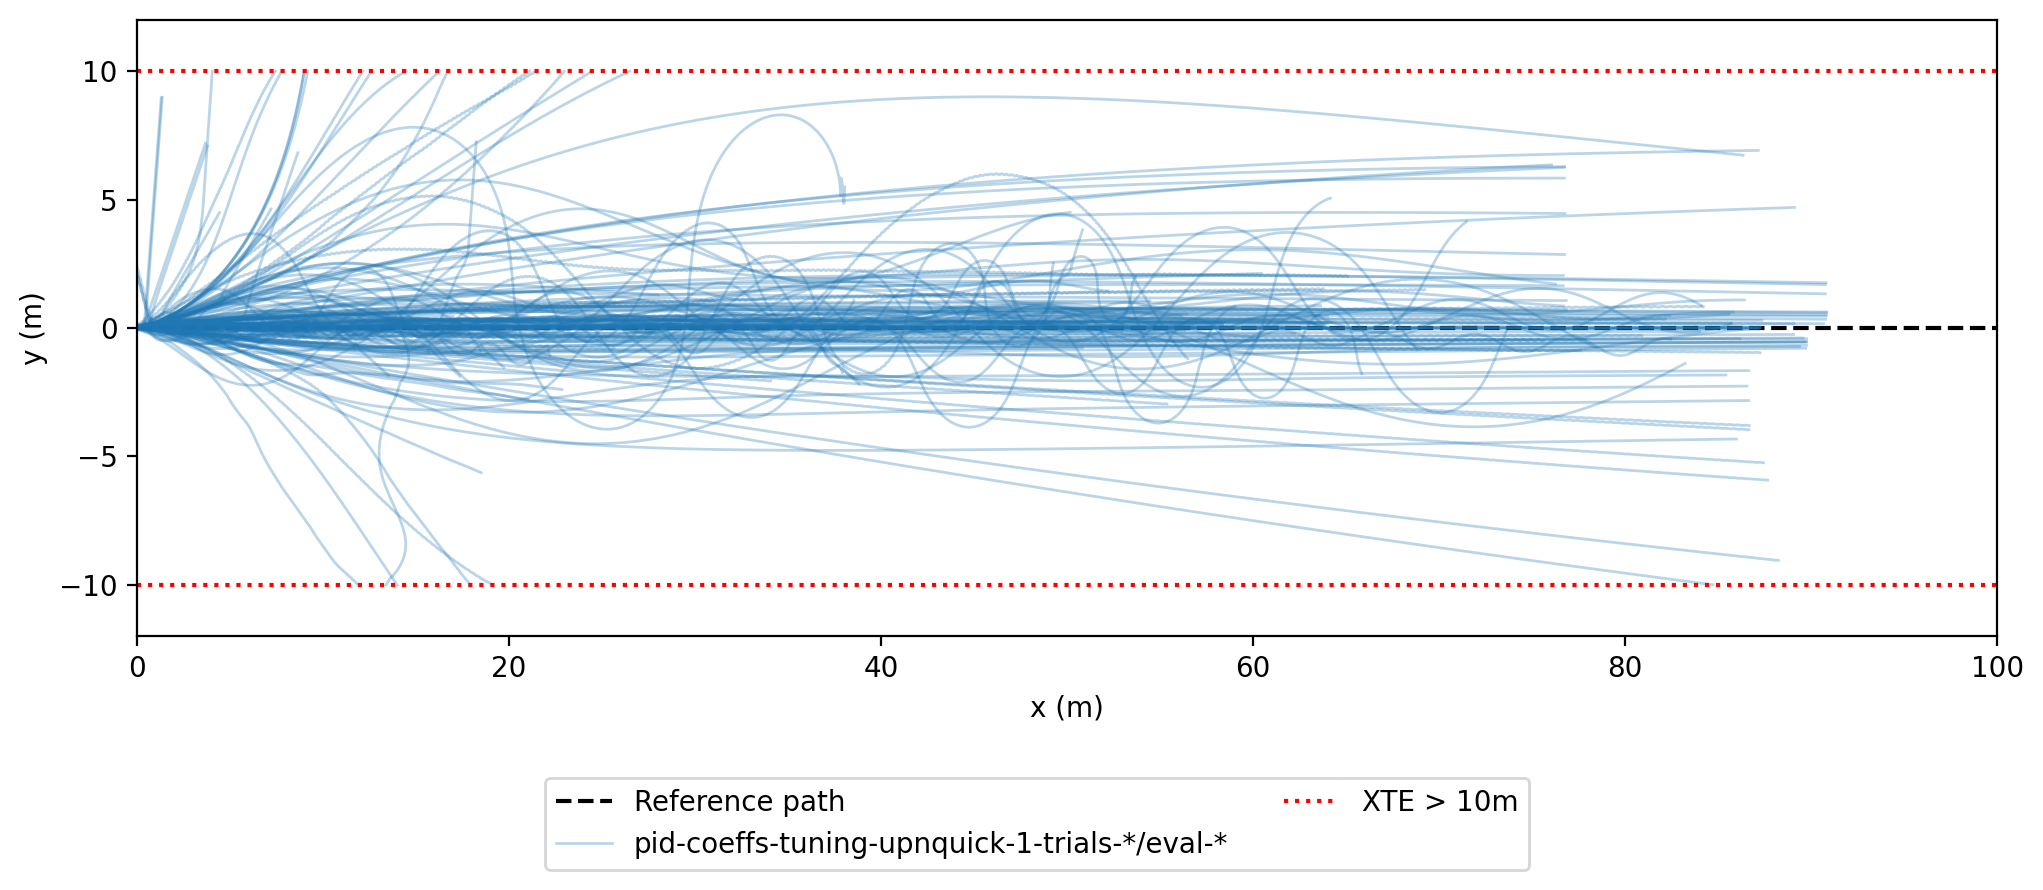

In [69]:
draw_trajectories([
    'pid-coeffs-tuning-upnquick-1-trials-*/eval-*',
])

# Run 26/08 (2)

**Corrections:**
- Fix n_envs in `scripts/sb3_hyperparams_tuning.py.py` (was None instead of number of wind dirs)
- Rescale map to be match the new path length

# Run 26/08 (4)

**Corrections:**
- Add stop condition when boat heading is over 90deg from the path to follow (avoid moving backward)
- Add logger for SB3 to log everything instead of only the input model observations

pid-coeffs-tuning-upnquick-4-trials-270deg-42/eval-*: 100%|██████████| 1/1 [00:00<00:00, 20.99it/s]


Failed to load 0 files for pid-coeffs-tuning-upnquick-4-trials-270deg-42/eval-*


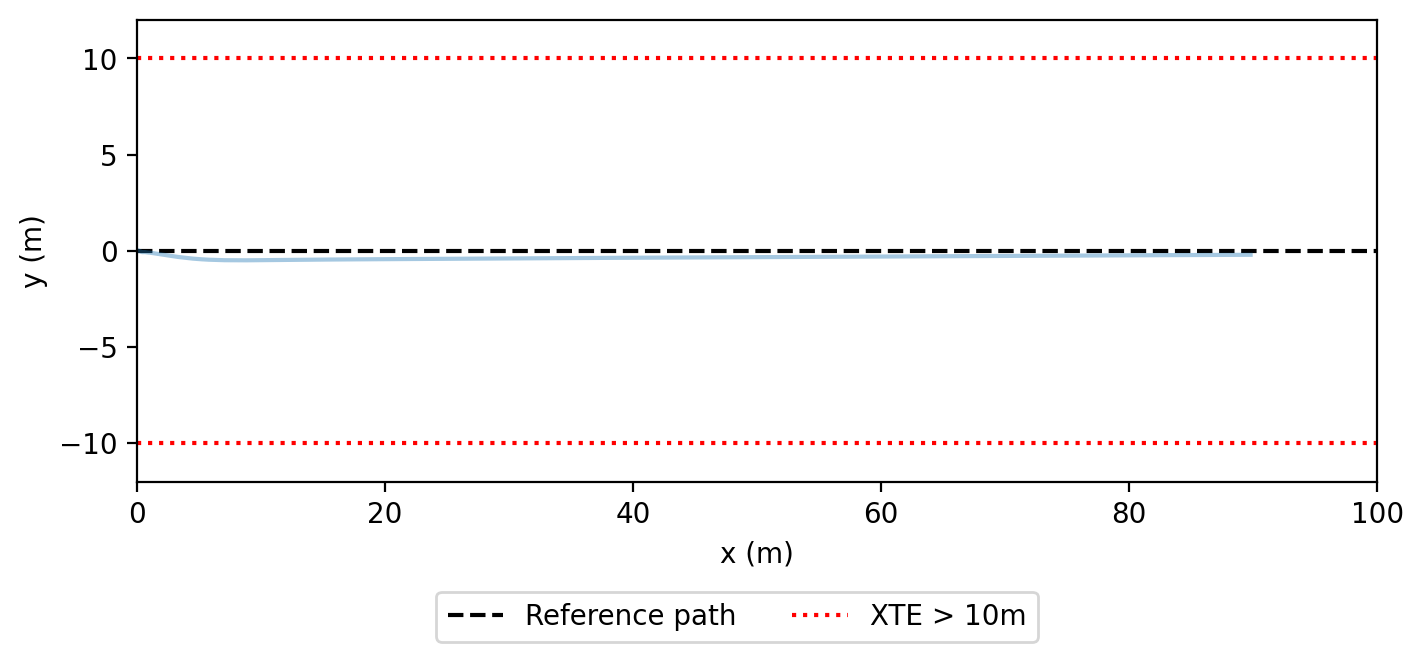

In [99]:
draw_trajectories([
    ('pid-coeffs-tuning-upnquick-4-trials-270deg-42/eval-*', None),
])

pid-shared-coeffs-tuning-ourasi-4-trials-22/eval-*: 100%|██████████| 7/7 [00:00<00:00, 38.06it/s]


Failed to load 0 files for pid-shared-coeffs-tuning-ourasi-4-trials-22/eval-*


pid-shared-coeffs-tuning-ourasi-4-trials-6/eval-*: 100%|██████████| 7/7 [00:00<00:00, 58.86it/s]


Failed to load 0 files for pid-shared-coeffs-tuning-ourasi-4-trials-6/eval-*


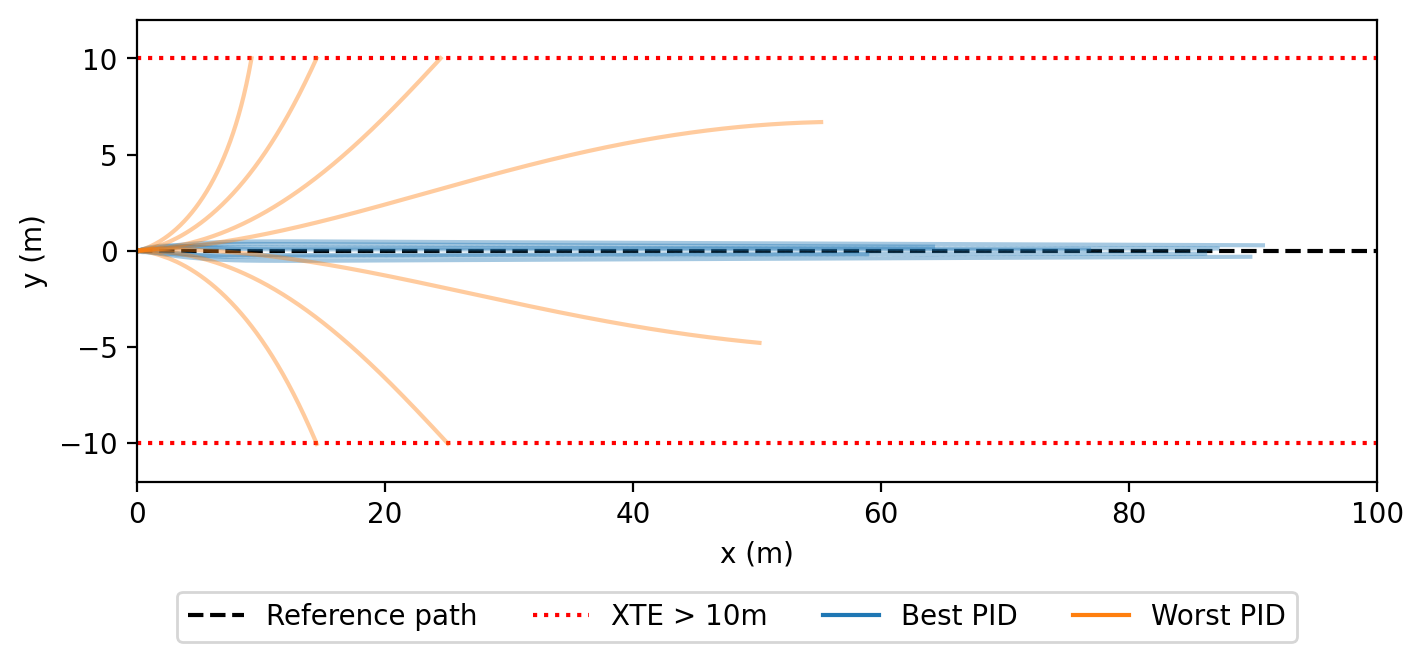

In [92]:
draw_trajectories([
    ('pid-shared-coeffs-tuning-ourasi-4-trials-22/eval-*', 'Best PID'),
    ('pid-shared-coeffs-tuning-ourasi-4-trials-6/eval-*', 'Worst PID'),
])

## SB3

sb3-tuning-coktailjet-4-trials-*/train-*: 100%|██████████| 1024/1024 [00:09<00:00, 103.73it/s]


Failed to load 851 files for sb3-tuning-coktailjet-4-trials-*/train-*


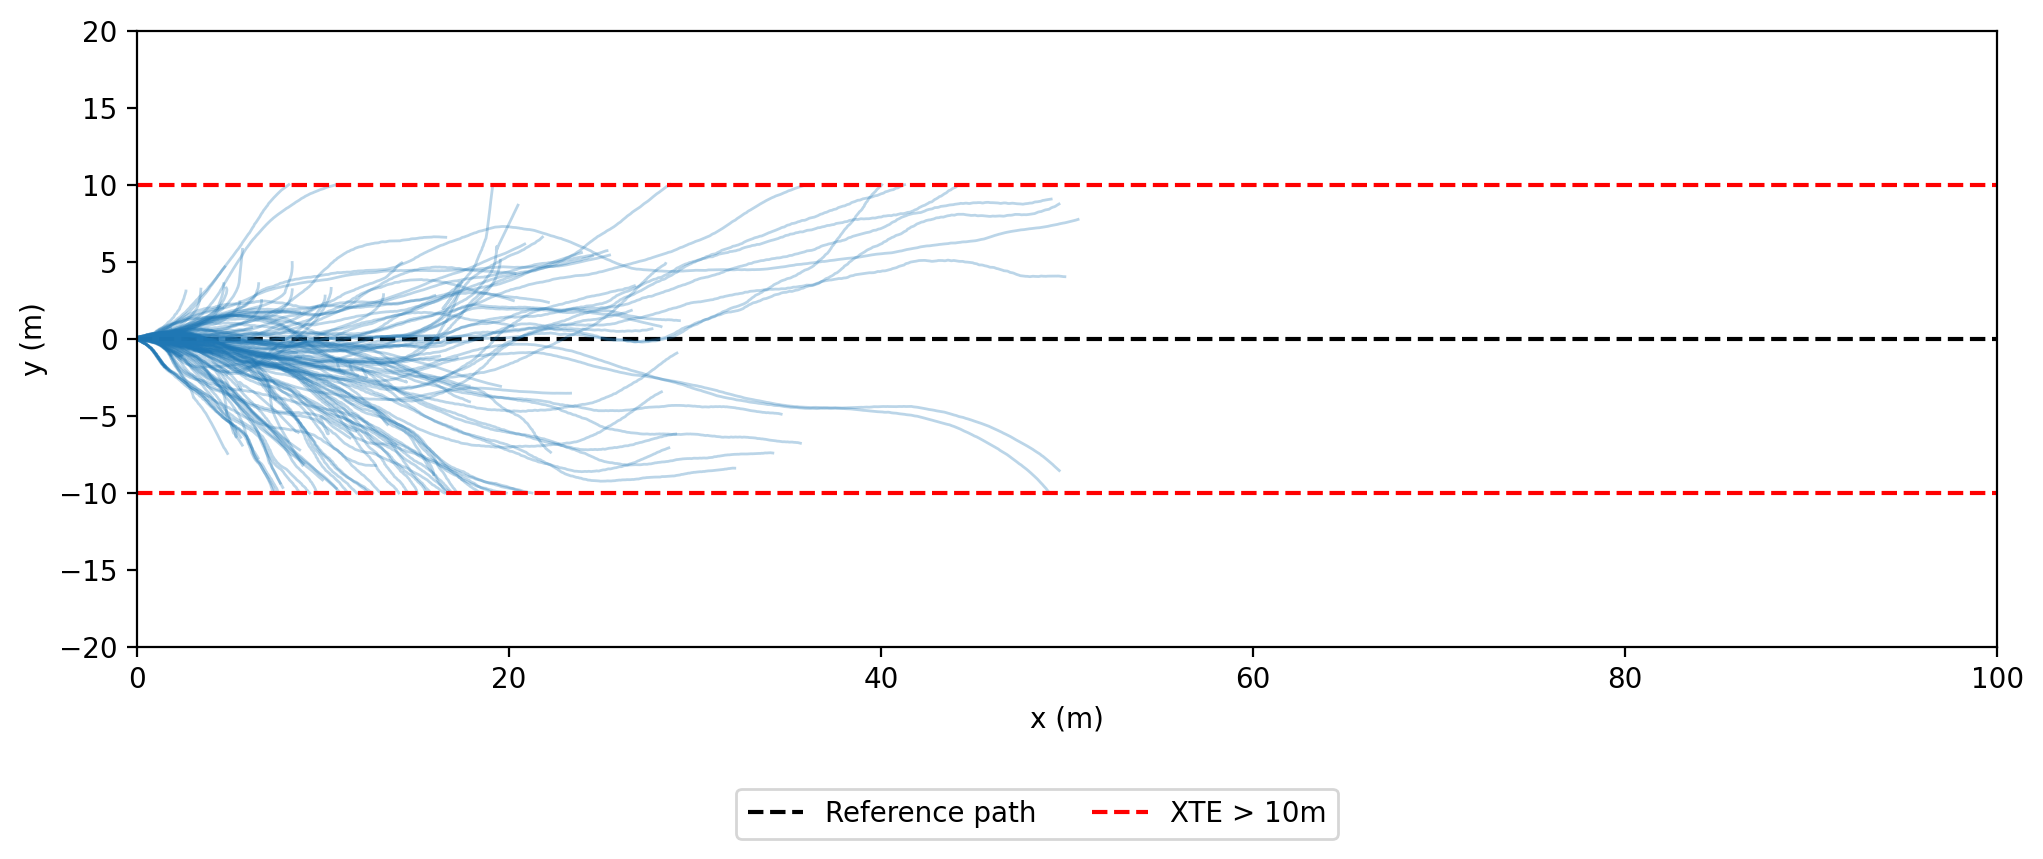

In [60]:
draw_trajectories([
    'sb3-tuning-coktailjet-4-trials-*/train-*',
])

sb3-tuning-coktailjet-4-trials-*/eval-*: 100%|██████████| 1205/1205 [00:15<00:00, 79.37it/s]


Failed to load 1021 files for sb3-tuning-coktailjet-4-trials-*/eval-*


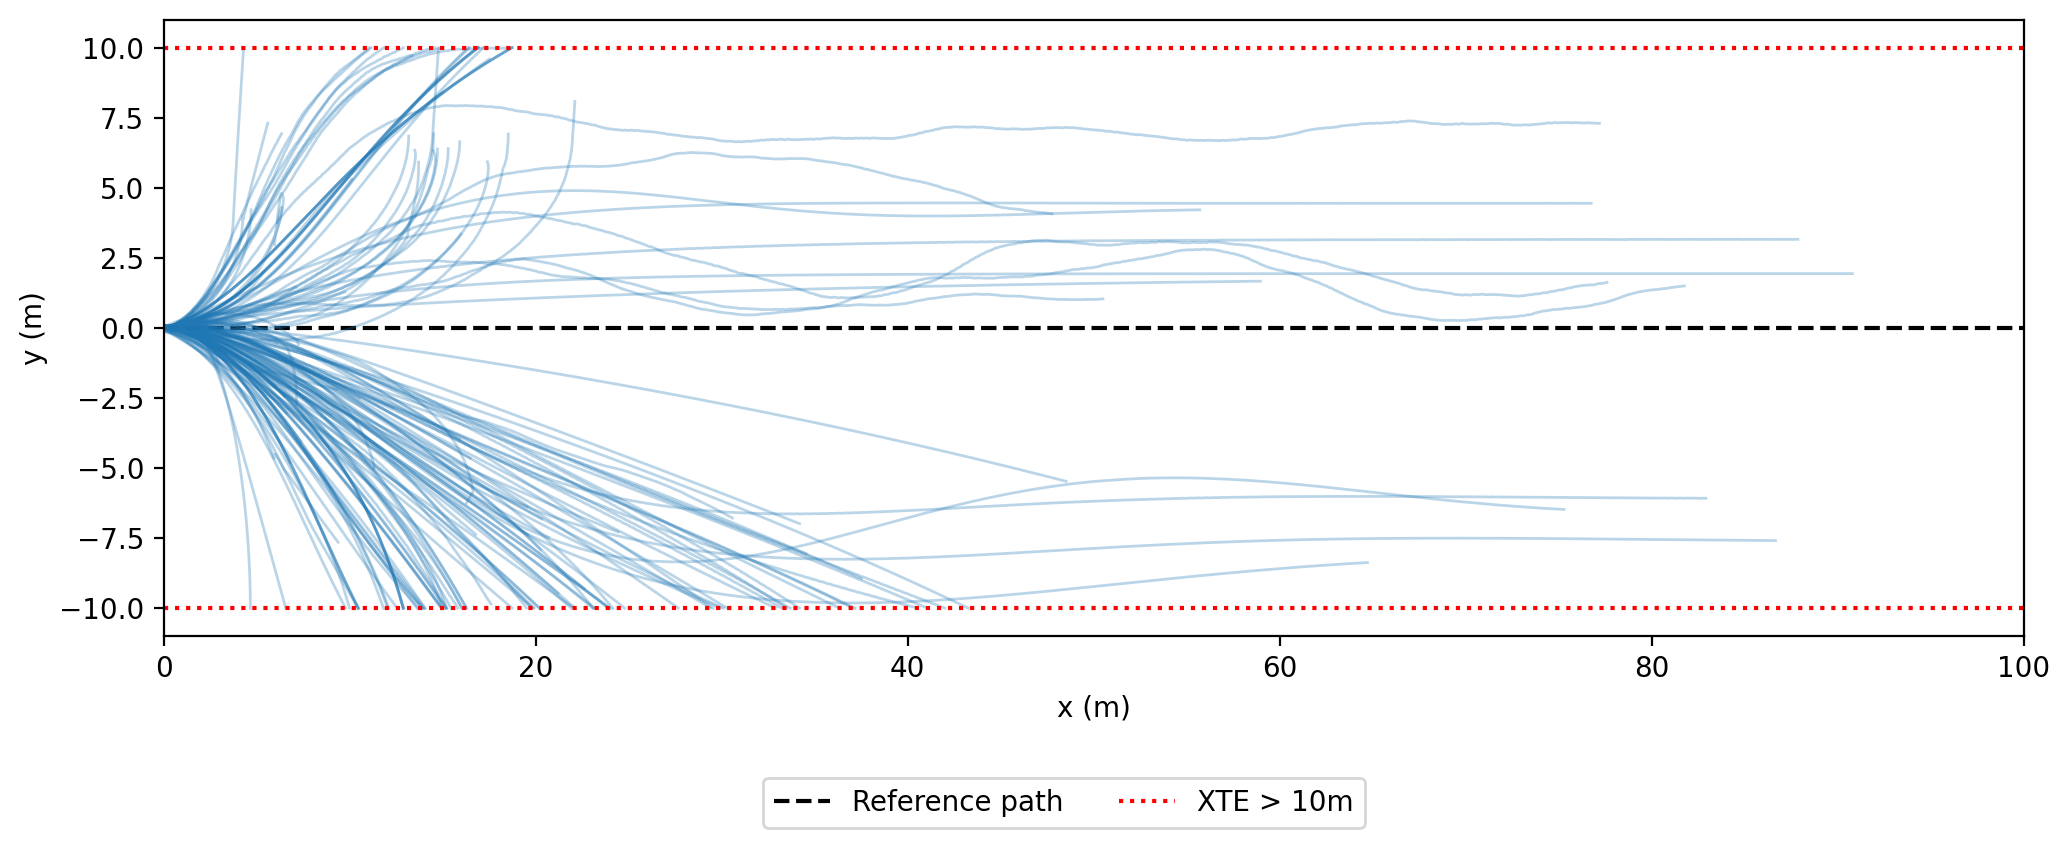

In [64]:
draw_trajectories([
    'sb3-tuning-coktailjet-4-trials-*/eval-*',
])

sb3-tuning-coktailjet-4-trials-*/train-*: 100%|██████████| 1024/1024 [00:10<00:00, 97.78it/s]


Failed to load 8 files for sb3-tuning-coktailjet-4-trials-*/train-*


sb3-tuning-coktailjet-4-trials-*/eval-*: 100%|██████████| 1193/1193 [00:17<00:00, 69.19it/s]


Failed to load 2 files for sb3-tuning-coktailjet-4-trials-*/eval-*


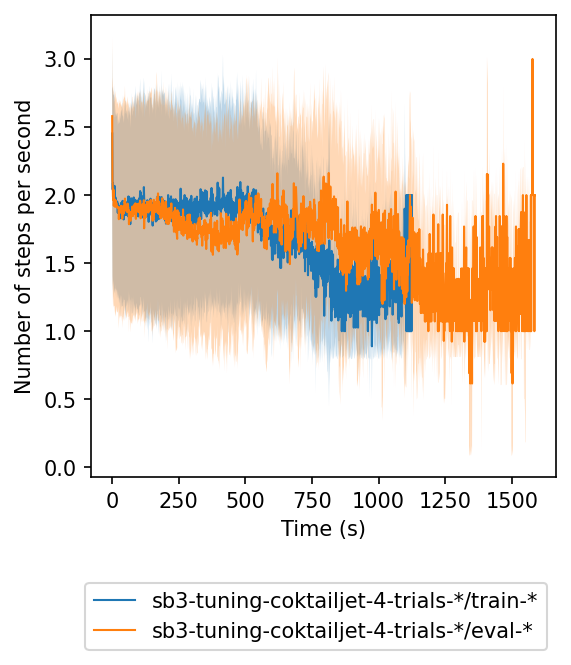

In [54]:
plot_nb_steps_per_seconds([
    'sb3-tuning-coktailjet-4-trials-*/train-*',
    'sb3-tuning-coktailjet-4-trials-*/eval-*',
])

Drawing derivatives of sb3-tuning-coktailjet-4-trials-*/train-*


sb3-tuning-coktailjet-4-trials-*/train-*: 100%|██████████| 1050/1050 [00:12<00:00, 82.49it/s]


Failed to load 851 files for sb3-tuning-coktailjet-4-trials-*/train-*


sb3-tuning-coktailjet-4-trials-*/train-*: 100%|██████████| 1050/1050 [00:09<00:00, 108.45it/s]


Failed to load 851 files for sb3-tuning-coktailjet-4-trials-*/train-*


sb3-tuning-coktailjet-4-trials-*/train-*: 100%|██████████| 1050/1050 [00:08<00:00, 122.14it/s]


Failed to load 851 files for sb3-tuning-coktailjet-4-trials-*/train-*
Drawing derivatives of sb3-tuning-coktailjet-4-trials-*/eval-*


sb3-tuning-coktailjet-4-trials-*/eval-*: 100%|██████████| 1205/1205 [00:08<00:00, 134.60it/s]


Failed to load 1021 files for sb3-tuning-coktailjet-4-trials-*/eval-*


sb3-tuning-coktailjet-4-trials-*/eval-*: 100%|██████████| 1205/1205 [00:09<00:00, 128.24it/s]


Failed to load 1021 files for sb3-tuning-coktailjet-4-trials-*/eval-*


sb3-tuning-coktailjet-4-trials-*/eval-*: 100%|██████████| 1205/1205 [00:09<00:00, 121.25it/s]


Failed to load 1021 files for sb3-tuning-coktailjet-4-trials-*/eval-*


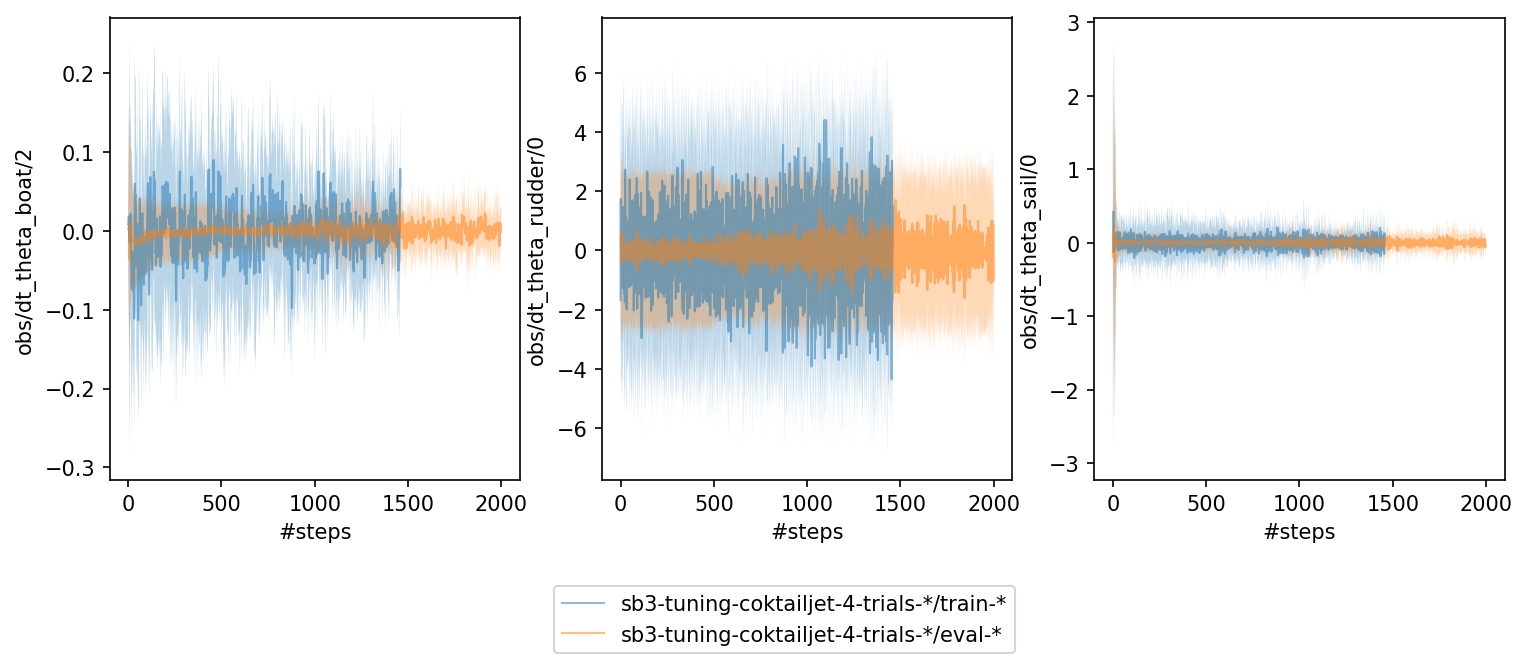

In [65]:
print_derivatives([
    'sb3-tuning-coktailjet-4-trials-*/train-*',
    'sb3-tuning-coktailjet-4-trials-*/eval-*',
])

# Run 27/08 (7)

**Corrections:**
- Change evaluation to only run 1 episode for each environment and not reach number of steps
- Fix reward penalty (one computed on previous step instead of current step)
- Simplify obs
- Fix prev_step of reward to handle reset

pid-shared-coeffs-tuning-ourasi-4-trials-22/eval-*: 100%|██████████| 7/7 [00:00<00:00, 30.95it/s]


Failed to load 0 files for pid-shared-coeffs-tuning-ourasi-4-trials-22/eval-*


pid-shared-coeffs-tuning-ourasi-4-trials-6/eval-*: 100%|██████████| 7/7 [00:00<00:00, 53.99it/s]


Failed to load 0 files for pid-shared-coeffs-tuning-ourasi-4-trials-6/eval-*


sb3-tuning-coktailjet-7-trials-7/eval-*:   0%|          | 0/7 [00:00<?, ?it/s]

sb3-tuning-coktailjet-7-trials-7/eval-*: 100%|██████████| 7/7 [00:00<00:00, 12.63it/s]


Failed to load 0 files for sb3-tuning-coktailjet-7-trials-7/eval-*


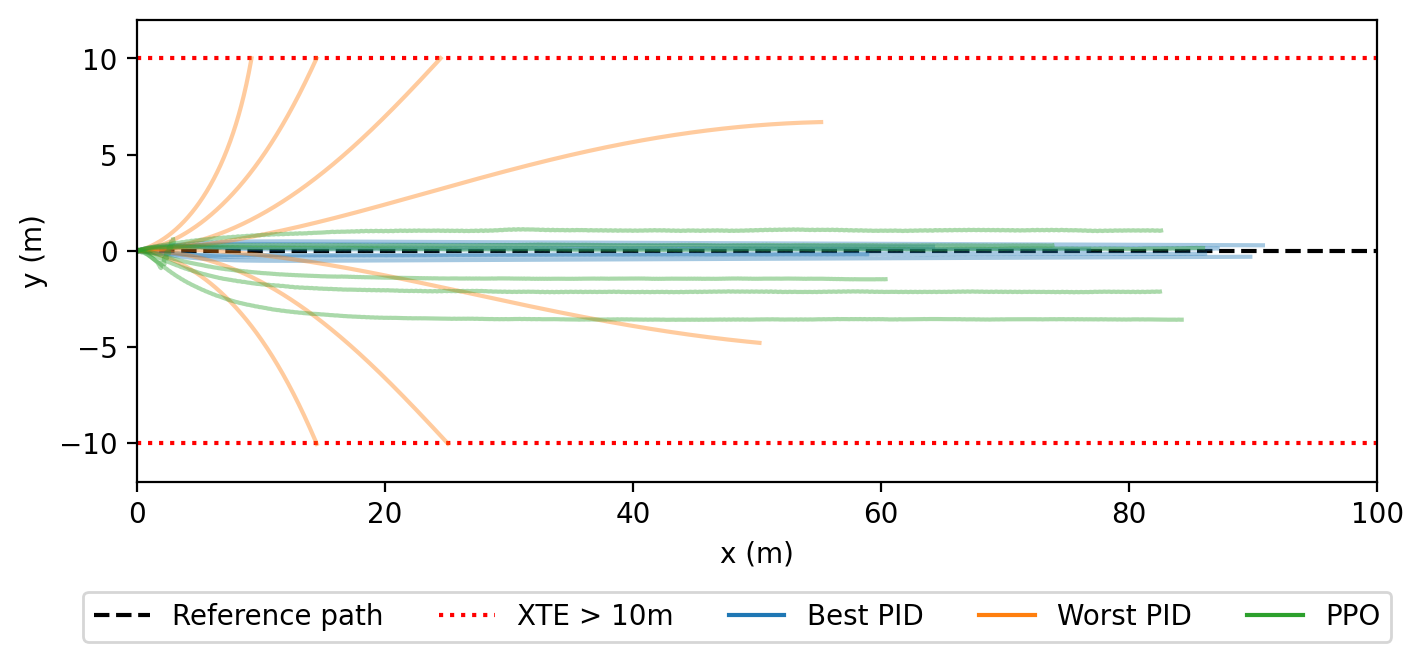

In [7]:
draw_trajectories([
    ('pid-shared-coeffs-tuning-ourasi-4-trials-22/eval-*', 'Best PID'),
    ('pid-shared-coeffs-tuning-ourasi-4-trials-6/eval-*', 'Worst PID'),
    ('sb3-tuning-coktailjet-7-trials-7/eval-*', 'PPO'),
])